In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

In [15]:
#Data from coinmarketcap
df = pd.read_csv("Bitcoin_data.csv", sep=';')

In [16]:
print(df.head())

           Date       Open*        High         Low     Close**  \
0  Apr 14, 2023  $30,409.56  $31,005.61  $30,044.50  $30,485.70   
1  Apr 13, 2023  $29,892.74  $30,539.85  $29,878.62  $30,399.07   
2  Apr 12, 2023  $30,231.58  $30,462.48  $29,725.57  $30,139.05   
3  Apr 11, 2023  $29,653.68  $30,509.08  $29,609.30  $30,235.06   
4  Apr 10, 2023  $28,336.03  $29,771.46  $28,189.27  $29,652.98   

            Volume        Market Cap  
0  $22,659,995,079  $589,786,626,447  
1  $17,487,721,001  $588,084,165,990  
2  $18,651,929,926  $583,034,311,649  
3  $20,121,259,843  $584,854,674,446  
4  $19,282,400,094  $573,568,312,635  


In [17]:
df = df.replace({"\$": ""}, regex=True)

In [18]:
df = df.replace({",":""}, regex=True)
df = df.rename(columns={"Close**": "Close"}).rename(columns={"Open*": "Open"})
df[["Open", "High", "Low", "Close"]] = df[["Open", "High", "Low", "Close"]].astype(float)
#numpy can conver large numbers
df[["Volume", "Market Cap"]] = df[["Volume", "Market Cap"]].astype(np.int64)
#df = df.replace({"Jan": "1, "}, regex=True).replace({"Feb": "2, "}, regex=True).replace({"Mar": "3, "}, regex=True).replace({"Apr": "4, "}, regex=True).replace({"May": "5, "}).replace({"Jun": "6, "}, regex=True).replace({"Jul": "7, "}, regex=True).replace({"Aug": "8, "}, regex=True).replace({"Sep": "9, "}, regex=True).replace({"Oct": "10, "}, regex=True).replace({"Nov": "11, "}, regex=True).replace({"Dec": "12, "}, regex=True)

In [19]:
df["Date"] = pd.to_datetime(df["Date"])

In [20]:
print(df.dtypes)

Date          datetime64[ns]
Open                 float64
High                 float64
Low                  float64
Close                float64
Volume                 int64
Market Cap             int64
dtype: object


In [21]:
#df["Volume_movement"] = df["Volume"] - df["Volume"].shift(-1)
#df["Volume_movement %"] = ((df['Volume'] / df['Volume'].shift(-1)) - 1) * 100

In [22]:
#df["Price_movement"] = df["Close"] - df["Open"]
#df["Price_movement %"] = ((df["Close"] / df["Open"]) - 1) * 100

In [23]:
df.fillna(0)

,Date,Open,High,Low,Close,Volume,Market Cap
0,2023-04-14,30409.56000,31005.61000,30044.50000,30485.70000,22659995079,589786626447
1,2023-04-13,29892.74000,30539.85000,29878.62000,30399.07000,17487721001,588084165990
2,2023-04-12,30231.58000,30462.48000,29725.57000,30139.05000,18651929926,583034311649
3,2023-04-11,29653.68000,30509.08000,29609.30000,30235.06000,20121259843,584854674446
4,2023-04-10,28336.03000,29771.46000,28189.27000,29652.98000,19282400094,573568312635
...,...,...,...,...,...,...,...
4654,2010-07-17,0.06650,0.07774,0.05742,0.06599,0,0
4655,2010-07-16,0.05800,0.07222,0.05748,0.06649,0,0
4656,2010-07-15,0.05640,0.06795,0.05397,0.05757,0,0
4657,2010-07-14,0.05816,0.06159,0.04865,0.05640,0,0


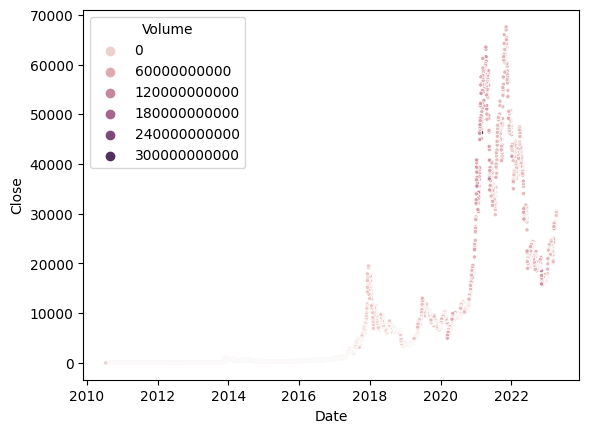

In [24]:
#Full data history
sns.scatterplot(x="Date", y="Close", hue="Volume", data=df, marker= ".")
plt.show()

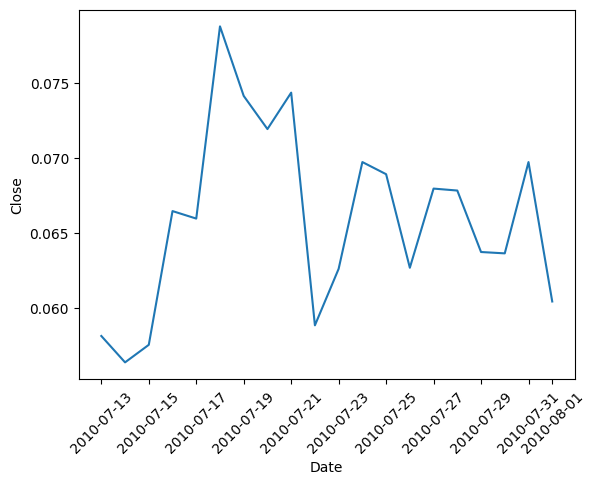

In [25]:
#Data from last 20 days price at close
sns.lineplot(x="Date", y="Close", data=df[-20:])
plt.xticks(rotation=45)
plt.show()

In [26]:
#### Machine Learning #####

# Reverse the order of the rows in the DataFrame (Old top, New down)
df = df.iloc[::-1]

# Set the date column as the index of the DataFrame
df.set_index("Date", inplace=True)

# Select the variable for SARIMAX modeling
endog = df['Close']
df

,Open,High,Low,Close,Volume,Market Cap
Date,,,,,,
2010-07-13,0.06183,0.06635,0.05262,0.05816,0,0
2010-07-14,0.05816,0.06159,0.04865,0.05640,0,0
2010-07-15,0.05640,0.06795,0.05397,0.05757,0,0
2010-07-16,0.05800,0.07222,0.05748,0.06649,0,0
2010-07-17,0.06650,0.07774,0.05742,0.06599,0,0
...,...,...,...,...,...,...
2023-04-10,28336.03000,29771.46000,28189.27000,29652.98000,19282400094,573568312635
2023-04-11,29653.68000,30509.08000,29609.30000,30235.06000,20121259843,584854674446
2023-04-12,30231.58000,30462.48000,29725.57000,30139.05000,18651929926,583034311649


In [27]:
# Create the SARIMAX model and fit it to the data
model = sm.tsa.statespace.SARIMAX(endog, order=(1, 1, 1), seasonal_order=(1, 1, 0, 12))
results = model.fit()

C:\Users\Toni\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\Toni\miniconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [28]:
# Make predictions using the fitted model
forecast = results.predict(start='2010-07-13', end='2023-06-01')

In [29]:
print(forecast)

2010-07-13        0.000000
2010-07-14        0.057975
2010-07-15        0.056239
2010-07-16        0.057419
2010-07-17        0.066311
                  ...     
2023-05-28    31756.765042
2023-05-29    31959.292270
2023-05-30    31952.126837
2023-05-31    32024.158596
2023-06-01    31935.757306
Freq: D, Name: predicted_mean, Length: 4707, dtype: float64


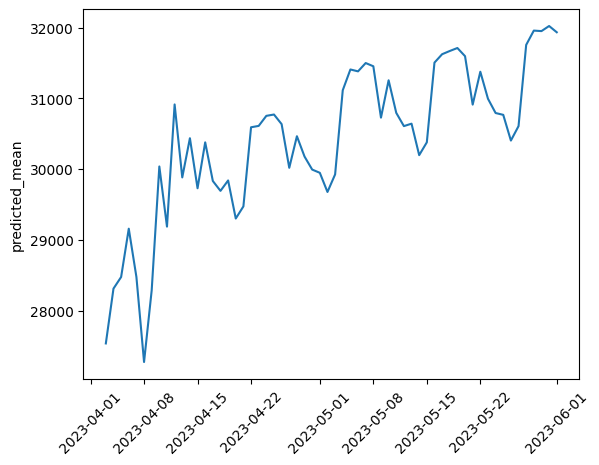

In [30]:
sns.lineplot(data=forecast[-60:], linestyle= "-")
plt.xticks(rotation=45)
plt.show()